# The Spark Foundation

## Data Science and Business Analytics

### Task  :-  Prediction using Supervised ML
### Predict the percentage of an student based on the no. of study hours.
        
### Author :- Gayatri Dhumal

###### Import Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

###### Reading the Dataset

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()              # prints first five data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()            # prints last five data

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


###### Data Preprocessing

In [6]:
df.shape           # Checking for number of rows and cols

(25, 2)

In [7]:
# Checking for null values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
# Statistical representation of data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# Checking the corelations between the features

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


###### Heatmap for Correlation

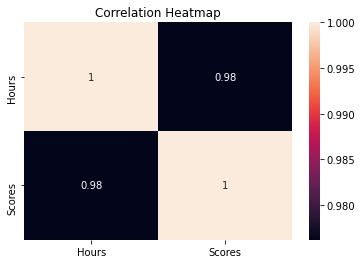

In [19]:
sn.heatmap(df.corr(), annot = True)       # 2D graphical represation of a correlation of all columns
plt.title("Correlation Heatmap")
plt.show()

###### Data Visualization

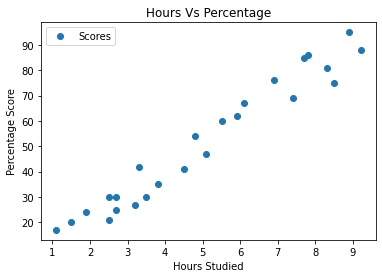

In [20]:
# Plotting the distribution of scores

df.plot(x = "Hours", y = "Scores", style = 'o')
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score i.e the student score depend upon the numbers of hours they studied.

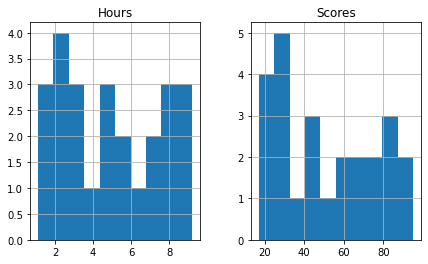

In [22]:
df.hist(figsize = (7,4))
plt.show()

###### Dividing the data into train and test 

In [27]:
x = df.iloc[:,:-1].values     # Converting 1D array to 2D array
y = df.iloc[:,1]

In [29]:
print(x)                     # Independent Variable (Hours)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [30]:
print(y)                    # Dependent Variable (Scores)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


###### Split the data

In [31]:
# 20% for testing and 80% for training

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

###### Fit the data into Linear Model

In [32]:
model = LinearRegression()

In [33]:
model.fit(x_train, y_train)

LinearRegression()

In [35]:
print("Coefficient : ", model.coef_)
print("Intercept : ", model.intercept_)

Coefficient :  [9.91065648]
Intercept :  2.018160041434683


###### Plotting the Regression Line

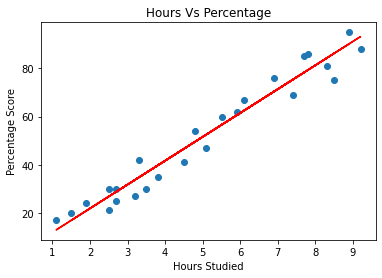

In [41]:
line = model.coef_ * x + model.intercept_
plt.scatter(x,y)
plt.plot(x, line, color = 'r')
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

The red line is the best fit line for this data.

###### Making Predictions

In [42]:
y_predict = model.predict(x_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [43]:
# Compare actual Vs predicted values

df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


###### Evaluation of Model

In [46]:
#Using metrics to find mean absolute error and r2-score to see the accuracy

print("Mean Absolute Error : {} ". format(metrics.mean_absolute_error(y_test, y_predict)))
print("R2-Score : % .2f " % r2_score(y_test, y_predict))

Mean Absolute Error : 4.183859899002975 
R2-Score :  0.95 


###### Predicting the score with the single input value

In [49]:
hours = 9.25
predicted_score = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predicted_score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
